In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
    resume_data = pd.read_csv(r"D:\MAS\Semester 2\NLP\Project\Resume Analyzer\Resume\Resume.csv")
    resume_data

ID                                         Resume_str  \
0     16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1     22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2     33176873           HR DIRECTOR       Summary      Over 2...   
3     27018550           HR SPECIALIST       Summary    Dedica...   
4     17812897           HR MANAGER         Skill Highlights  ...   
...        ...                                                ...   
2479  99416532           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
2480  24589765           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
2481  31605080           GEEK SQUAD AGENT         Professional...   
2482  21190805           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
2483  37473139           STOREKEEPER II       Professional Sum...   

                                            Resume_html  Category  
0     <div class="fontsize fontface vmargins hmargin...        HR  
1     <div class="fontsize fontface vmargins hmargin...        HR  
2     <div class="fontsize fontface vmargins hmargin...        HR  
3     <div class="fontsize fontface vmargins hmargin...        HR  
4     <div class="fontsize fontface vmargins hmargin...        HR  
...                                                 ...       ...  
2479  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2480  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2481  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2482  <div class="fontsize fontface vmargins hmargin...  AVIATION  
2483  <div class="fontsize fontface vmargins hmargin...  AVIATION  

[2484 rows x 4 columns]

In [6]:
pip install PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [11]:
from PyPDF2 import PdfReader

def extract_text_from_pdf(file_path):
    reader = PdfReader(file_path)
    text = "".join(page.extract_text() for page in reader.pages)
    %pip install PyPDF2
    return text

In [12]:
from nltk import pos_tag, sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    sentences = sent_tokenize(text)
    features = {'feature': ""}
    stop_words = set(stopwords.words("english"))
    for sent in sentences:
        if any(criteria in sent for criteria in ['skills', 'education']):
            words = word_tokenize(sent)
            words = [word for word in words if word not in stop_words]
            tagged_words = pos_tag(words)
            filtered_words = [word for word, tag in tagged_words if tag not in ['DT', 'IN', 'TO', 'PRP', 'WP']]
            features['feature'] += " ".join(filtered_words)
    return features

In [6]:
def process_resume_data(df):
    id = df['ID']
    category = df['Category']
    text = extract_text_from_pdf(f"/kaggle/input/resume-dataset/data/data/{category}/{id}.pdf")
    features = preprocess_text(text)
    df['Feature'] = features['feature']
    return df

In [7]:
    num_desc = 15
    resume_data = pd.read_csv("/kaggle/input/resume-dataset/Resume/Resume.csv")
    resume_data = resume_data.drop(["Resume_html"], axis=1)
    resume_data = resume_data.apply(process_resume_data, axis=1)
    resume_data = resume_data.drop(columns=['Resume_str'])
    resume_data.to_csv("/kaggle/working/resume_data.csv", index=False)

    job_description = pd.read_csv("/kaggle/input/resume-and-job-description/training_data.csv")
    job_description = job_description[["job_description", "position_title"]][:num_desc]
    job_description['Features'] = job_description['job_description'].apply(lambda x : preprocess_text(x)['feature'])

In [8]:
resume_data


ID  Category                                            Feature
0     16852973        HR  hr administrator marketing associate hr admini...
1     22323967        HR  hr specialist hr operations summary media prof...
2     33176873        HR  hr director summary years experience recruitin...
3     27018550        HR  hr specialist summary dedicated driven dynamic...
4     17812897        HR  hr manager skill highlights hr skills hr depar...
...        ...       ...                                                ...
2479  99416532  AVIATION  rank sgt e non commissioned officer charge bri...
2480  24589765  AVIATION  government relations communications organizati...
2481  31605080  AVIATION  geek squad agent professional profile support ...
2482  21190805  AVIATION  program director office manager summary highly...
2483  37473139  AVIATION  storekeeper ii professional summary purpose do...

[2484 rows x 3 columns]

In [9]:
categories = np.sort(resume_data['Category'].unique())
categories
# create new df for corpus and category
df_categories = [resume_data[resume_data['Category'] == category].loc[:, ['Feature', 'Category']] for category in categories]

In [13]:
from wordcloud import WordCloud
def wordcloud(df):
    txt = ' '.join(txt for txt in resume_data['Feature'])
    wordcloud = WordCloud(
        height=2000,
        width=4000
    ).generate(txt)

    return wordcloud

ModuleNotFoundError: No module named 'wordcloud'

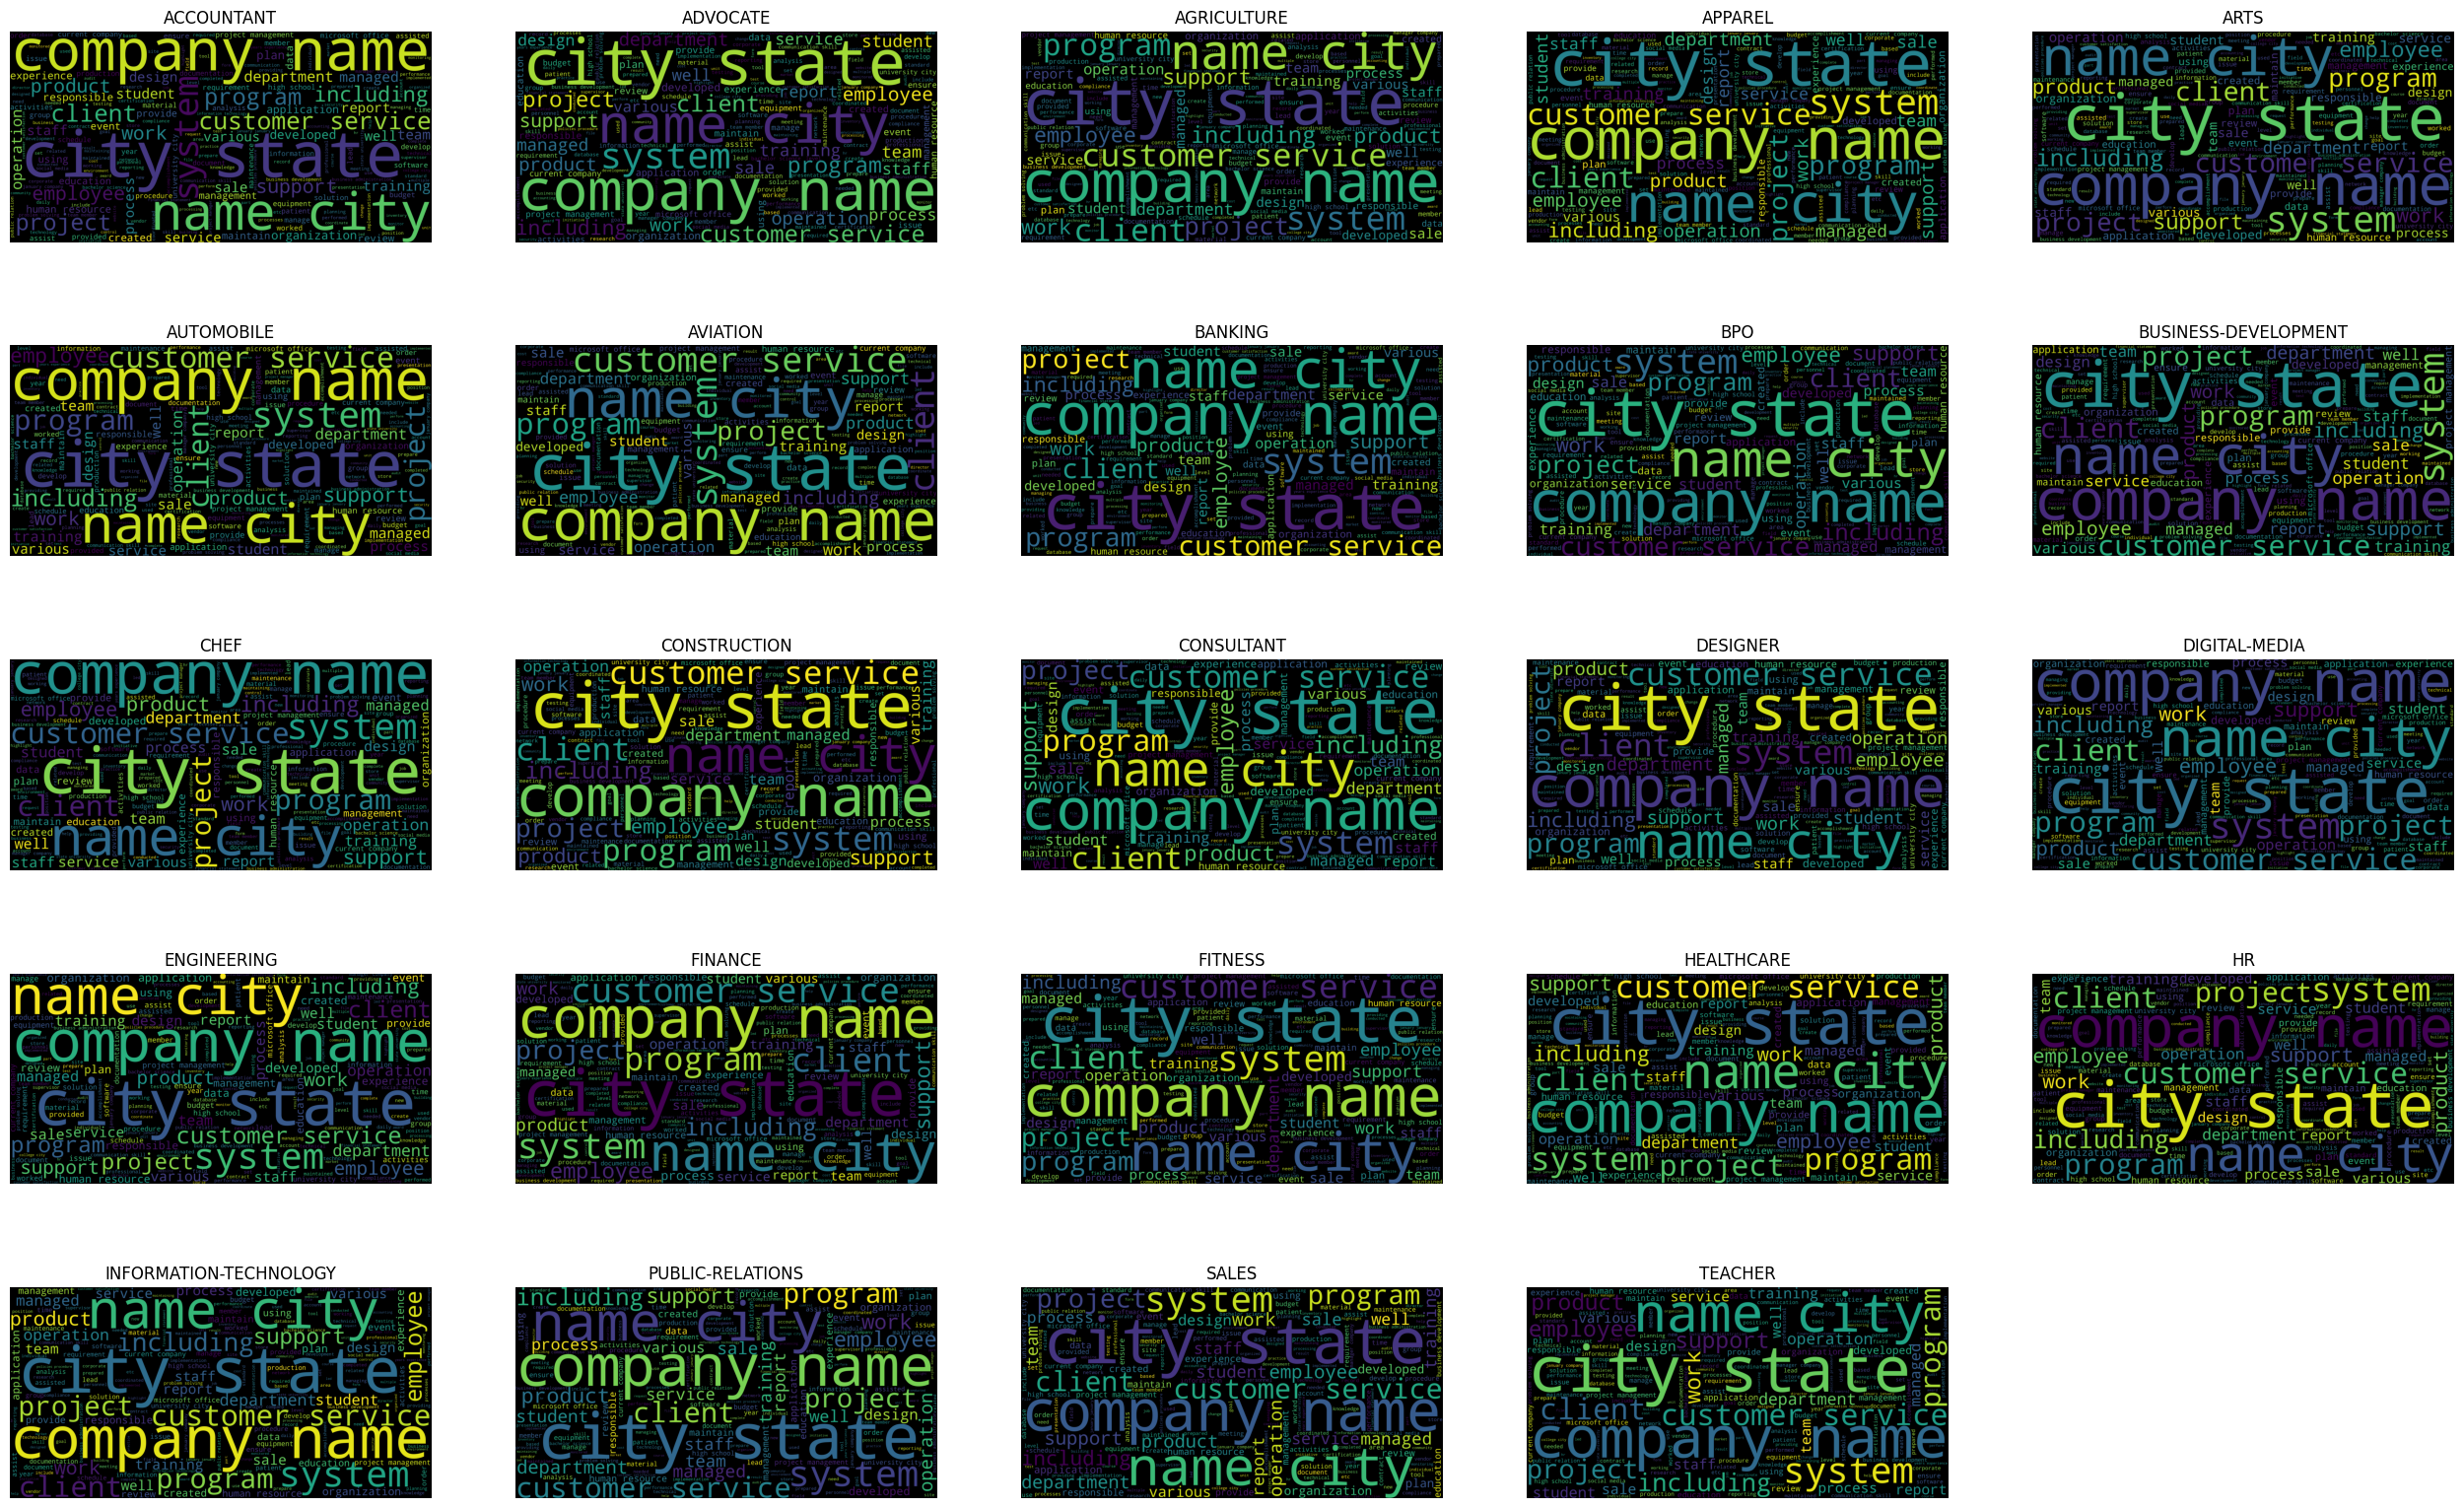

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [12]:
def remove_extra_word(text):
    
    extra_word=['company', 'name', 'citi', 'state', 'work', 'manag', 'project'] # extra words
    words = text.split()  # Split the text into words
    
    # Filter out the extra words
    filter_word = [word for word in words if word not in extra_word]
    
    filter_text = ' '.join(filter_word)
    
    return filter_text


# apply resume_data['Cleaned_Resume']

resume_data['Feature']=resume_data['Feature'].apply(lambda x:remove_extra_word(x))

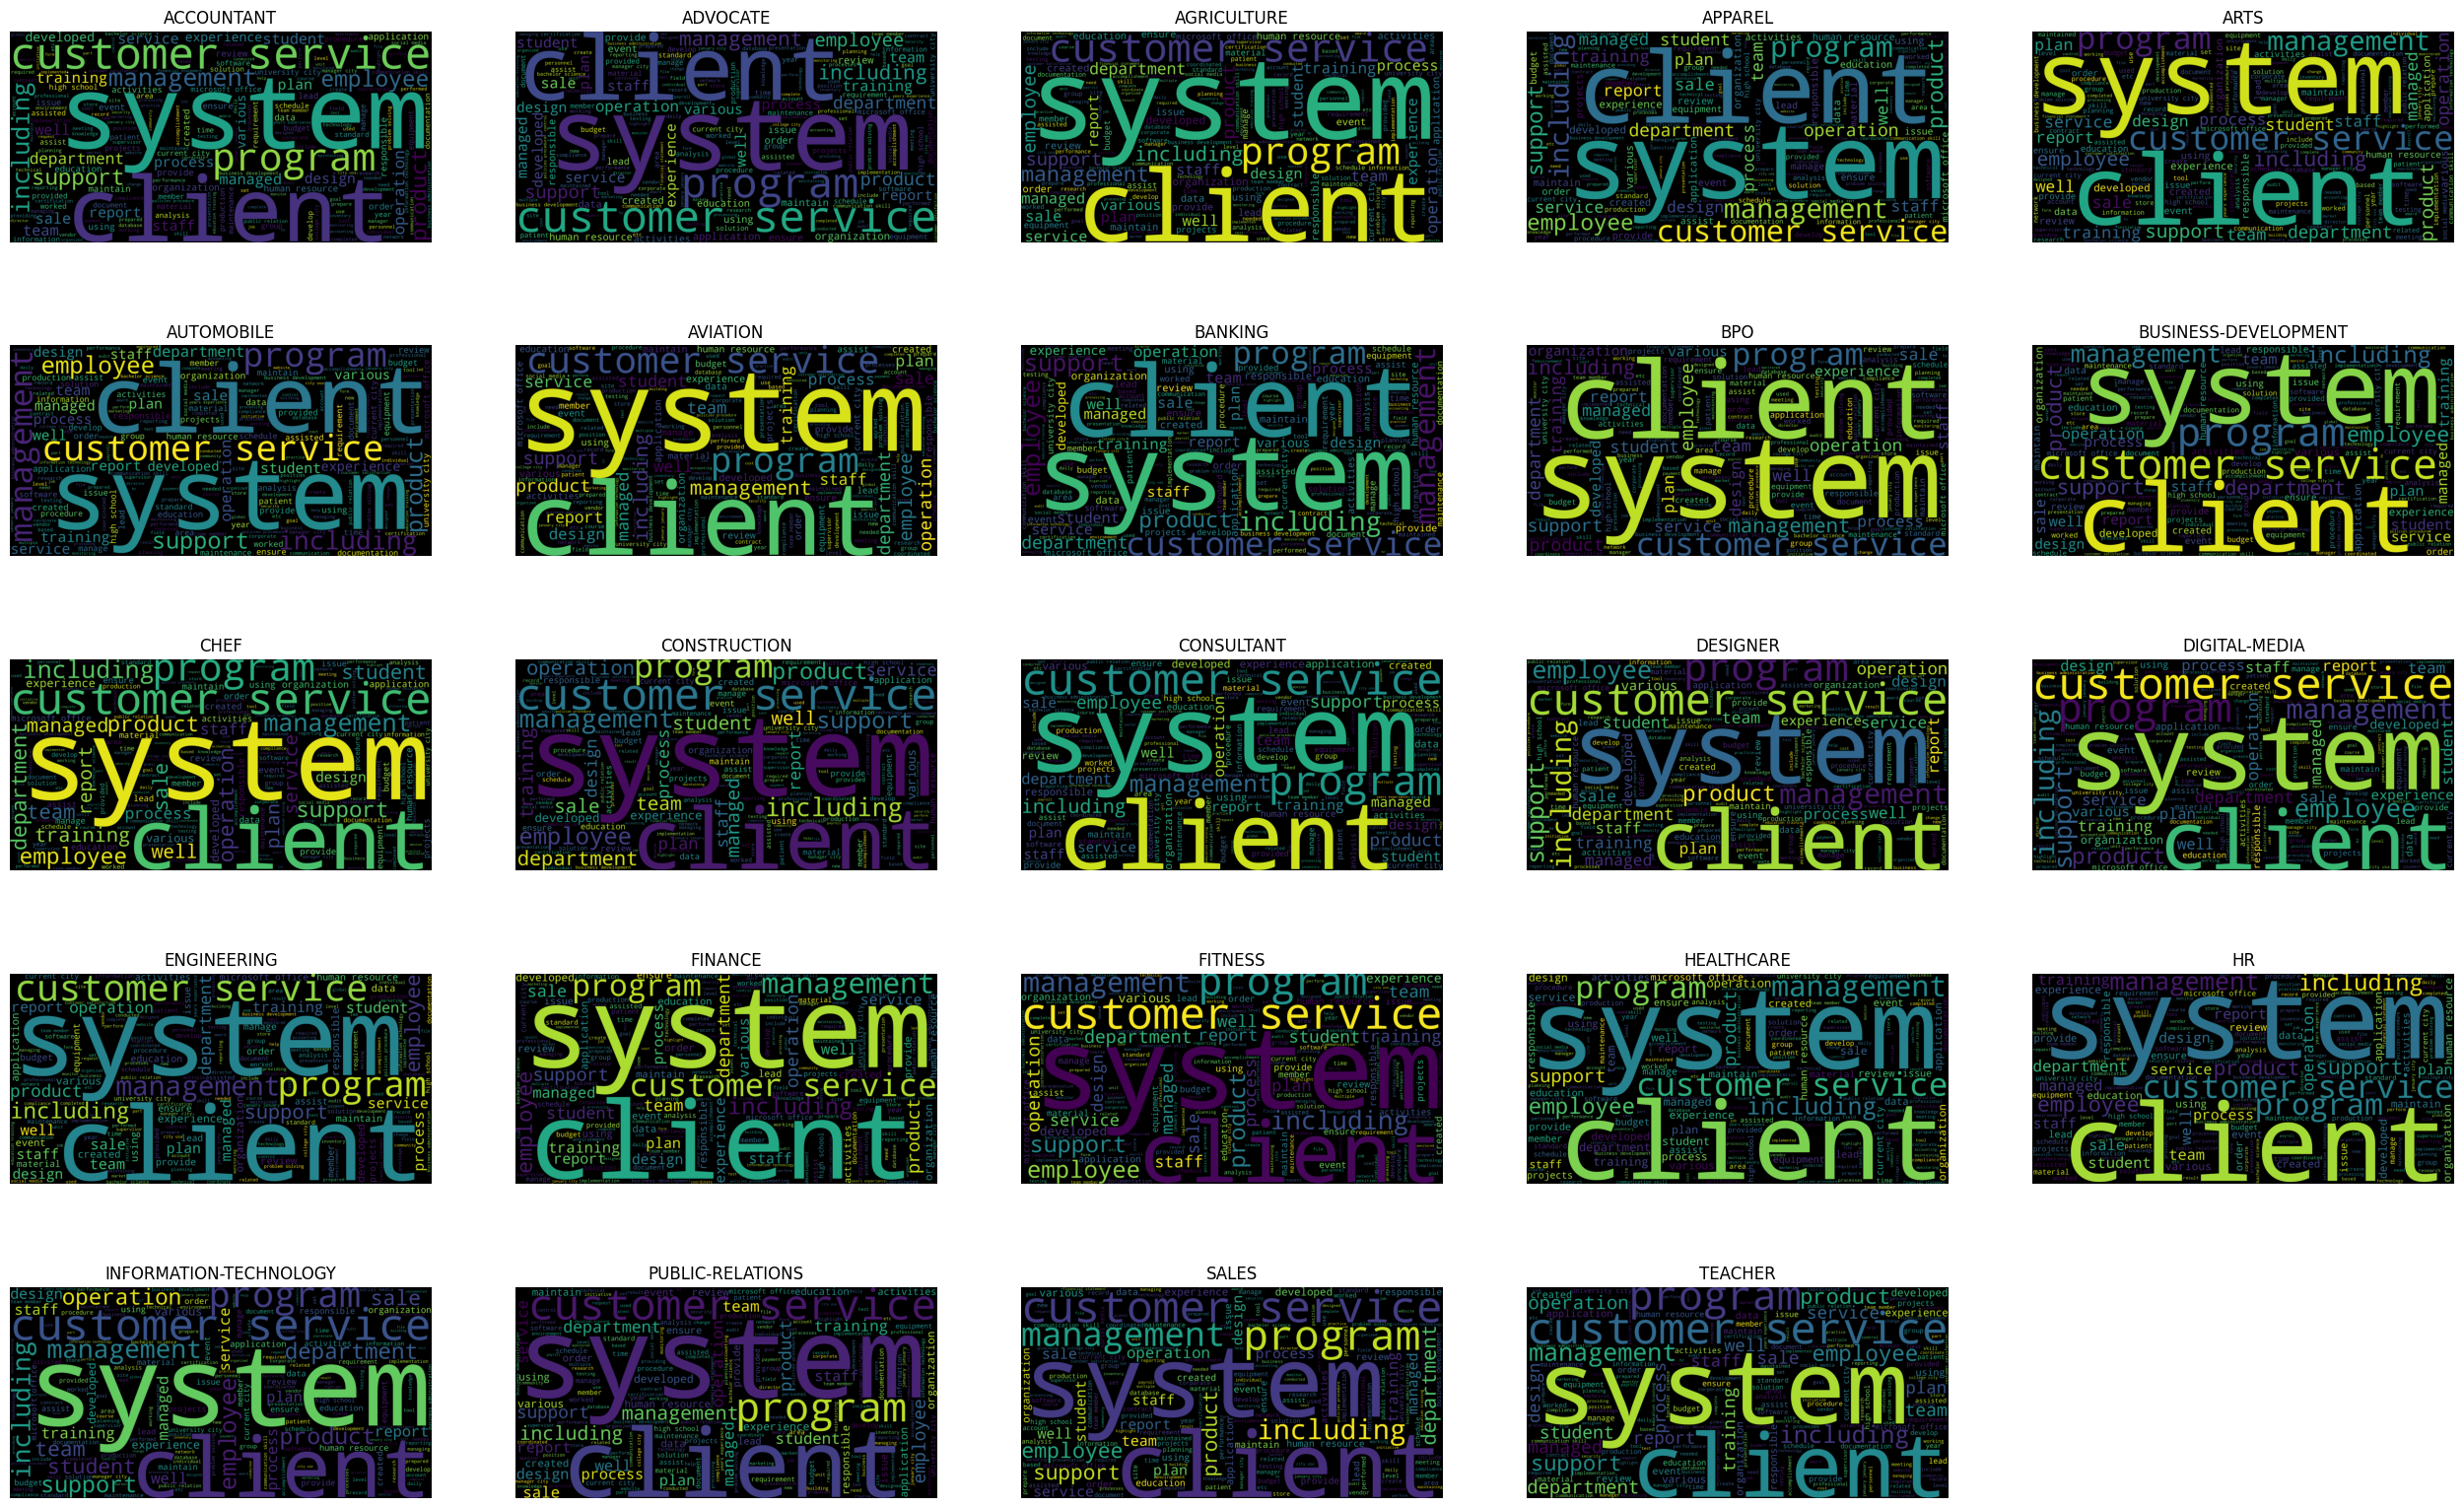

In [13]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

resume_data['Category']=encoder.fit_transform(resume_data['Category'])
resume_data.head()

ID  Category                                            Feature
0  16852973        19  hr administrator marketing associate hr admini...
1  22323967        19  hr specialist hr operations summary media prof...
2  33176873        19  hr director summary years experience recruitin...
3  27018550        19  hr specialist summary dedicated driven dynamic...
4  17812897        19  hr manager skill highlights hr skills hr depar...

In [15]:
resume_data.Category.unique().shape

(24,)

In [16]:
# Split data into training and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(resume_data['Feature'], resume_data['Category'], test_size=0.15, random_state=42, stratify=resume_data['Category'])


# Print the sizes of the split datasets
print("Train data size:", X_train.shape)
print("Validation data size:", X_test.shape)

Train data size: (2111,)
Validation data size: (373,)


In [17]:
job_description

job_description  \
0   minimum qualifications\nbachelors degree or eq...   
1   description\nas an asc you will be highly infl...   
2   its an amazing time to be joining netflix as w...   
3   description\n\nweb designers looking to expand...   
4   at trackfive weve got big goals were on a miss...   
5   designups is a nashville based design and inte...   
6   about the position\n\nthe web designer is resp...   
7   job description\n\nzander insurance group is o...   
8   tuff is a growth marketing team working with c...   
9   type of requisition regular\n\nclearance level...   
10  web developer\n\njob id \n\n positions \n\nloc...   
11  snapshot is looking for a back end developer t...   
12   we are seeking a senior ui designer who relis...   
13   design develop and test high quality software...   
14  if youre passionate about building a better fu...   

                               position_title  \
0                            Sales Specialist   
1                  Apple Solutions Consultant   
2   Licensing Coordinator - Consumer Products   
3                                Web Designer   
4                               Web Developer   
5                      Frontend Web Developer   
6                     Remote Website Designer   
7                                Web Designer   
8                                Web Designer   
9                            SR. Web Designer   
10                              Web Developer   
11                              Web Developer   
12                         Senior UI Designer   
13                    Wordpress Web Developer   
14                            UI Web Designer   

                                             Features  
0   minimum qualifications bachelors degree equiva...  
1   description asc highly influential growing min...  
2   amazing time joining netflix continue transfor...  
3   description web designers looking expand profe...  
4   trackfive weve got big goals mission revolutio...  
5   designups nashville based design interactive a...  
6   position web designer responsible providing de...  
7                                                      
8   tuff growth marketing team working clients dri...  
9   type requisition regular clearance level must ...  
10  web developer job id positions location ustnna...  
11  snapshot looking back end developer join organ...  
12  seeking senior ui designer relishes methodical...  
13  design develop test high quality software feat...  
14  youre passionate building better future indivi...

In [18]:
job_desc = job_description.drop(['job_description', 'position_title'], axis=1)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english',max_features=800)
tfidf_train_vectors = tfidf.fit_transform(X_train)
tfidf_test_vectors =tfidf.transform(X_test)

tfidf_jobDesc_vectors = tfidf.fit_transform(job_desc['Features'])
tfidf_train_vectors

<2111x800 sparse matrix of type '<class 'numpy.float64'>'
	with 333294 stored elements in Compressed Sparse Row format>

In [20]:
tfidf_jobDesc_vectors_dense = tfidf_jobDesc_vectors.toarray()
tfidf_train_vectors_dense = tfidf_train_vectors.toarray()
tfidf_train_vectors_dense.shape, tfidf_jobDesc_vectors_dense.shape

((2111, 800), (15, 800))

In [21]:
tfidf_test_vectors

<373x800 sparse matrix of type '<class 'numpy.float64'>'
	with 61073 stored elements in Compressed Sparse Row format>

In [22]:
tfidf.get_feature_names_out()

array(['abilities', 'ability', 'able', 'access', 'account', 'accounts',
       'act', 'action', 'active', 'ada', 'adding', 'additional', 'adobe',
       'adobexd', 'ads', 'advance', 'advanced', 'advertising', 'advocate',
       'aesthetic', 'agency', 'amazing', 'andor', 'annual', 'api', 'apis',
       'apple', 'applicable', 'applicants', 'application', 'applications',
       'applied', 'apply', 'applying', 'apps', 'area', 'art', 'artist',
       'artists', 'assets', 'assigned', 'attention', 'audio',
       'authorized', 'available', 'bachelors', 'backend', 'backgrounds',
       'based', 'basic', 'believe', 'benefits', 'best', 'better',
       'beverage', 'big', 'blogs', 'bonus', 'bootstrap', 'brand',
       'brands', 'bring', 'bringing', 'broad', 'build', 'building',
       'business', 'businessability', 'businesses', 'businessexperience',
       'calendars', 'campaigns', 'canada', 'candidate', 'candidates',
       'capabilities', 'capable', 'capacity', 'career', 'catalog',
       'cat

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
k = 5
result_df = pd.DataFrame(columns=['jobId', 'resumeId', 'similarity', 'domainResume', 'domainDesc'])
for i, job_desc_emb in enumerate(tfidf_jobDesc_vectors_dense):
    job_desc_id = i
    job_title = job_description['position_title'].iloc[i]

    # Compute cosine similarities between the current job description and all resumes
    similarities = cosine_similarity([job_desc_emb], tfidf_train_vectors )
    top_k_indices = np.argsort(similarities[0])[::-1][:k]
   
    # Extract the relevant information and add it to the result DataFrame
    for j in top_k_indices:
        resume_id = resume_data['ID'].iloc[j]
        work_domain = resume_data['Category'].iloc[j]
        similarity_score = similarities[0][j]
        
        result_df.loc[i+j] = [job_desc_id, resume_id, similarity_score, work_domain,job_title ]
        

# Sort the results by similarity score (descending)
result_df = result_df.sort_values(by='similarity', ascending=False)

In [24]:
result_df.head()

jobId  resumeId  similarity  domainResume              domainDesc
407       0  37660306    0.450524            23        Sales Specialist
1529      5  25497147    0.415091            16  Frontend Web Developer
238       0  25207620    0.412135            20        Sales Specialist
1650      0  26829561    0.376752             3        Sales Specialist
1520      0  33685988    0.375479            16        Sales Specialist

In [25]:
result_group=result_df.groupby("jobId")
result_group

In [26]:
num_desc = 15
for i in range(num_desc):
    print()
    print("jobId---cosineSimilarity---domainResume---domainDesc")
    print(result_group.get_group(i).values[0])
    print()


jobId---cosineSimilarity---domainResume---domainDesc
[0 37660306 0.4505235091809445 23 'Sales Specialist']


jobId---cosineSimilarity---domainResume---domainDesc
[1 27409087 0.2231047428754217 16 'Apple Solutions Consultant']


jobId---cosineSimilarity---domainResume---domainDesc
[2 10840430 0.223036489215168 20
 'Licensing Coordinator - Consumer Products']


jobId---cosineSimilarity---domainResume---domainDesc
[3 29061628 0.26996063005911314 11 'Web Designer']


jobId---cosineSimilarity---domainResume---domainDesc
[4 12802330 0.348833990569499 0 'Web Developer']


jobId---cosineSimilarity---domainResume---domainDesc
[5 25497147 0.41509111485676153 16 'Frontend Web Developer']


jobId---cosineSimilarity---domainResume---domainDesc
[6 10265057 0.2445537541171244 20 'Remote Website Designer']


jobId---cosineSimilarity---domainResume---domainDesc
[7 21321598 0.0 21 'Web Designer']


jobId---cosineSimilarity---domainResume---domainDesc
[8 11958994 0.28907381239105245 13 'Web Designer']

